In [1]:
import numpy as np
from astropy.io import fits
from astropy import units as U
from pydl.pydlutils.spheregroup import spherematch
# -- iQuench -- 
from letstalkaboutquench import util as UT

read in Jeremy's catalog

In [2]:
tinker = np.loadtxt(''.join([UT.dat_dir(), 'tinker_SDSS_centrals_M9.7_pos.dat']))

In [40]:
tinker_ra, tinker_dec, tinker_dn4000, tinker_cz = tinker[:,23], tinker[:,24], tinker[:,6], tinker[:,18]
tinker_z = tinker_cz / 299792.
print('Tinker catalog has %i galaxies ' % len(tinker_z))

Tinker catalog has 12344 galaxies 


Text(0,0.5,'Dec')

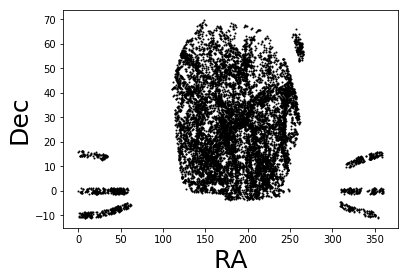

In [5]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(tinker_ra, tinker_dec, s=1, c='k')
sub.set_xlabel('RA', fontsize=25)
sub.set_ylabel('Dec', fontsize=25)

Read in NSA catalog

In [6]:
nsa = fits.open(''.join([UT.dat_dir(), 'nsa_v0_1_2.fits']))
nsa_data = nsa[1].data

In [7]:
print('NSA catalog has %i galaxies' % len(nsa_data.field('ra')))

NSA catalog has 145155 galaxies


Text(0,0.5,'Dec')

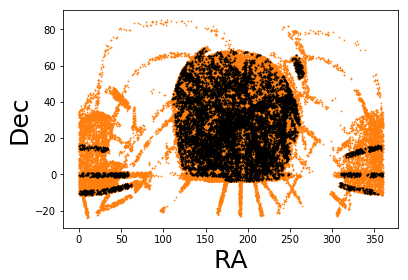

In [9]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(nsa_data.field('ra'), nsa_data.field('dec'), s=0.5, c='C1')
sub.scatter(tinker_ra, tinker_dec, s=1, c='k')
sub.set_xlabel('RA', fontsize=25)
sub.set_ylabel('Dec', fontsize=25)

(10.0, 11.0)

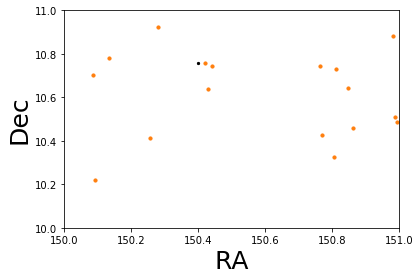

In [18]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(nsa_data.field('ra'), nsa_data.field('dec'), s=10, c='C1')
sub.scatter(tinker_ra, tinker_dec, s=5, c='k')
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim([150, 151])
sub.set_ylabel('Dec', fontsize=25)
sub.set_ylim([10., 11.])

christ jeremy, you put one decimal place for the $RA$ and $Dec$

(array([ 3.97974949,  5.06676599,  6.24482702, 11.60541853, 19.56491751,
        22.07278044, 25.3903879 , 23.88125586, 25.1917453 , 26.98642609,
        29.974342  ,  0.04138388,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 , 0.095, 0.1  ]),
 <a list of 20 Patch objects>)

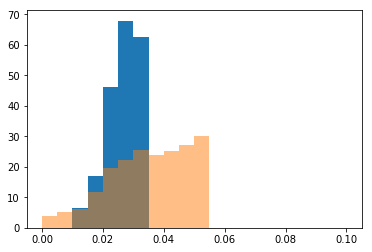

In [17]:
plt.hist(tinker_z, range=(0., 0.1), bins=20, density=True)
plt.hist(nsa_data.field('z'), range=(0., 0.1), bins=20, density=True, alpha=0.5)

In [11]:
match_length = (3 * U.arcsec).to(U.degree)
print('match length = %f degrees'% match_length.value)

match length = 0.000833 degrees


In [56]:
# now lets spherematch the two
m_nsa, m_tinker, dmatch = spherematch(np.round(nsa_data.field('ra'),1), np.round(nsa_data.field('dec'),2), tinker_ra, tinker_dec, 
                                      0.0001, maxmatch=0)

In [66]:
for m_tink in np.unique(m_tinker)[:1000]:
    tinktink = (m_tinker == m_tink) 
    if np.sum(tinktink) > 1: 
        print m_tink
        print('(RA, Dec) = (%f, %f)' % (tinker_ra[m_tink], tinker_dec[m_tink]))
        print([(r, d) for r, d in zip(nsa_data.field('ra')[m_nsa[tinktink]], nsa_data.field('dec')[m_nsa[tinktink]])])
        print tinker_cz[m_tink], tinker_cz[m_tink]/300000., nsa_data.field('z')[m_nsa[tinktink]]
        print nsa_data.field('z')[m_nsa[tinktink]] - (tinker_cz[m_tink]/300000.)

22
(RA, Dec) = (173.100000, 22.630000)
[(173.0864501177465, 22.630163888668314), (173.09279484516895, 22.626378421841164), (173.13105746751253, 22.62917919299896)]
7122.0 0.02374 [0.03093478 0.03147332 0.03672141]
[0.00719478 0.00773332 0.01298141]
31
(RA, Dec) = (140.900000, 22.310000)
[(140.85134725107122, 22.313129925077845), (140.88046976060784, 22.308147760977562)]
7584.0 0.02528 [0.03409364 0.02909697]
[0.00881364 0.00381697]
44
(RA, Dec) = (131.500000, 53.990000)
[(131.46069737118842, 53.99250223203382), (131.5205670667309, 53.99441230217395)]
8340.0 0.0278 [0.03095146 0.0300765 ]
[0.00315146 0.0022765 ]
45
(RA, Dec) = (200.600000, 21.790000)
[(200.5871590575622, 21.78950828318891), (200.58299833836895, 21.791210470194905)]
7756.0 0.025853333333333332 [0.03115493 0.0311677 ]
[0.0053016  0.00531437]
52
(RA, Dec) = (141.000000, 29.120000)
[(141.00602843796588, 29.123581529659933), (141.01593480359426, 29.117071524156852)]
3715.0 0.012383333333333333 [0.03272269 0.0333151 ]
[0.0203

738
(RA, Dec) = (161.200000, 38.760000)
[(161.16316538360962, 38.75952282942158), (161.2152147725714, 38.755941025341166)]
7023.0 0.02341 [0.0356506  0.03328139]
[0.0122406  0.00987139]
855
(RA, Dec) = (219.700000, 10.130000)
[(219.6596745204546, 10.129295241015596), (219.73662689099118, 10.126289171628967)]
9753.0 0.03251 [0.03083729 0.05477475]
[-0.00167271  0.02226475]
875
(RA, Dec) = (170.800000, 26.110000)
[(170.83241918317935, 26.113740200465017), (170.76128088012487, 26.11296109558706)]
6527.0 0.021756666666666667 [0.03294067 0.03244345]
[0.011184   0.01068679]
883
(RA, Dec) = (357.900000, 15.580000)
[(357.902740380541, 15.57888823558822), (357.948054662893, 15.581919802071717)]
8625.0 0.02875 [0.02642111 0.03684391]
[-0.00232889  0.00809391]
921
(RA, Dec) = (194.600000, 28.130000)
[(194.60635532891774, 28.128956258115213), (194.56269082343084, 28.125921314201214)]
5638.0 0.018793333333333332 [0.02736316 0.02490393]
[0.00856983 0.0061106 ]
989
(RA, Dec) = (159.400000, 46.040000)